# Localization

Predict a single bounding box per image. Uses the MobileNet-based classifier as the starting point.

**NOTE:** The results in this notebook are similar to those shown in the book but are not 100% the same. Because neural networks are initialized with random numbers, each training session will give slightly different results.

## Load the annotations

In [71]:
import os, sys
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
data_dir = "/Users/jingweixu/Library/CloudStorage/OneDrive-Personal/NJU课程/iOS智能开发/资料/datasets/snacks"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

In [74]:
train_annotations = pd.read_csv(os.path.join(data_dir, "annotations-train.csv"))
train_annotations.head()

,image_id,x_min,x_max,y_min,y_max,class_name,folder
0,009218ad38ab2010,0.192620,0.729831,0.127606,0.662219,cake,cake
1,009218ad38ab2010,0.802377,1.000000,0.102585,0.405338,ice cream,cake
2,009218ad38ab2010,0.814884,0.970607,0.121768,0.357798,ice cream,cake
3,00c7515143b32051,0.135084,0.904315,0.081735,0.909091,cake,muffin
4,00c7515143b32051,0.155722,0.910569,0.083403,0.893244,muffin,muffin


In [75]:
len(train_annotations)

7040

In [76]:
val_annotations = pd.read_csv(os.path.join(data_dir, "annotations-val.csv"))
test_annotations = pd.read_csv(os.path.join(data_dir, "annotations-test.csv"))

In [77]:
len(val_annotations), len(test_annotations)

(1417, 1380)

## Plot training image + its bounding boxes

In [78]:
image_width = 224
image_height = 224

In [79]:
from helpers import plot_image

In [80]:
from keras.preprocessing import image

def plot_image_from_row(row, image_dir):
    image_path = os.path.join(image_dir, row["folder"], row["image_id"] + ".jpg")
    img = image.load_img(image_path, target_size=(image_width, image_height))
    bbox = (row["x_min"], row["x_max"], row["y_min"], row["y_max"], row["class_name"])
    plot_image(img, [bbox])

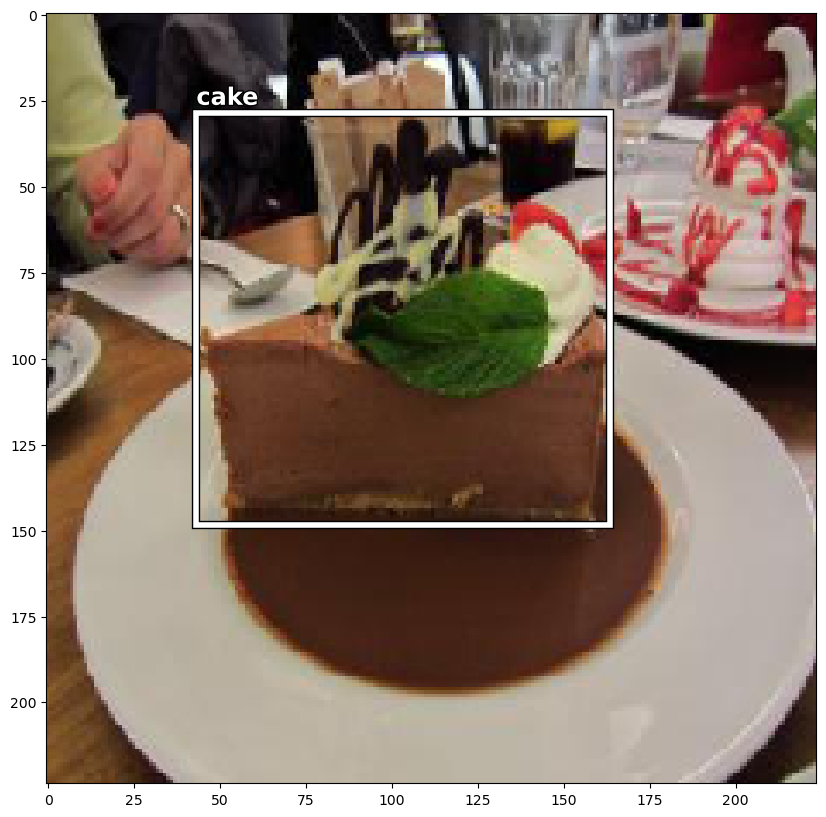

In [81]:
plot_image_from_row(train_annotations.iloc[0], train_dir)

## Custom generator

In [82]:
from helpers import BoundingBoxGenerator

In [83]:
batch_size = 32
train_generator = BoundingBoxGenerator(train_annotations, train_dir, 
                                       image_height, image_width, 
                                       batch_size, shuffle=True)

In [85]:
train_iter = iter(train_generator)
X, (y_class, y_bbox) = next(train_iter)

In [86]:
X.shape, y_class.shape, y_bbox.shape

((32, 224, 224, 3), (32,), (32, 4))

In [87]:
y_bbox

array([[5.22201e-01, 7.35460e-01, 1.41785e-01, 2.74395e-01],
       [2.56651e-01, 8.48200e-01, 0.00000e+00, 9.12363e-01],
       [3.97832e-01, 6.63053e-01, 2.15134e-01, 4.24640e-01],
       [1.41964e-01, 4.97186e-01, 4.03670e-01, 9.59967e-01],
       [2.00125e-01, 8.73046e-01, 1.85092e-01, 8.62647e-01],
       [1.12150e-01, 8.97196e-01, 4.75590e-02, 6.65832e-01],
       [6.71670e-01, 7.51720e-01, 5.31280e-01, 6.47738e-01],
       [5.69977e-01, 7.45113e-01, 5.63380e-01, 7.99296e-01],
       [6.44150e-02, 8.33646e-01, 9.34110e-02, 1.00000e+00],
       [4.48060e-01, 5.75720e-01, 3.83459e-01, 8.04511e-01],
       [7.84240e-01, 8.96811e-01, 2.59924e-01, 4.85822e-01],
       [8.46990e-02, 7.18579e-01, 2.11144e-01, 9.87292e-01],
       [5.39167e-01, 7.00000e-01, 4.91250e-01, 7.14375e-01],
       [3.28142e-01, 8.96552e-01, 0.00000e+00, 7.89317e-01],
       [0.00000e+00, 3.33265e-01, 1.50000e-05, 2.18633e-01],
       [1.01836e-01, 7.51252e-01, 3.46683e-01, 8.84856e-01],
       [0.00000e+00, 9.9

In [88]:
y_class

array([14,  9,  1,  2,  5, 14,  7, 17,  2, 19,  8, 10, 15, 16, 15, 11,  3,
       10, 18,  3,  4,  1,  4, 11,  7, 13,  1,  4,  5, 18,  9, 13])

In [89]:
from helpers import labels
list(map(lambda x: labels[x], y_class))

['popcorn',
 'ice cream',
 'banana',
 'cake',
 'cookie',
 'popcorn',
 'grape',
 'strawberry',
 'cake',
 'watermelon',
 'hot dog',
 'juice',
 'pretzel',
 'salad',
 'pretzel',
 'muffin',
 'candy',
 'juice',
 'waffle',
 'candy',
 'carrot',
 'banana',
 'carrot',
 'muffin',
 'grape',
 'pineapple',
 'banana',
 'carrot',
 'cookie',
 'waffle',
 'ice cream',
 'pineapple']

In [90]:
len(train_generator)

220

In [91]:
def plot_image_from_batch(X, y_class, y_bbox, img_idx):
    class_name = labels[y_class[img_idx]]
    bbox = y_bbox[img_idx]
    plot_image(X[img_idx], [[*bbox, class_name]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


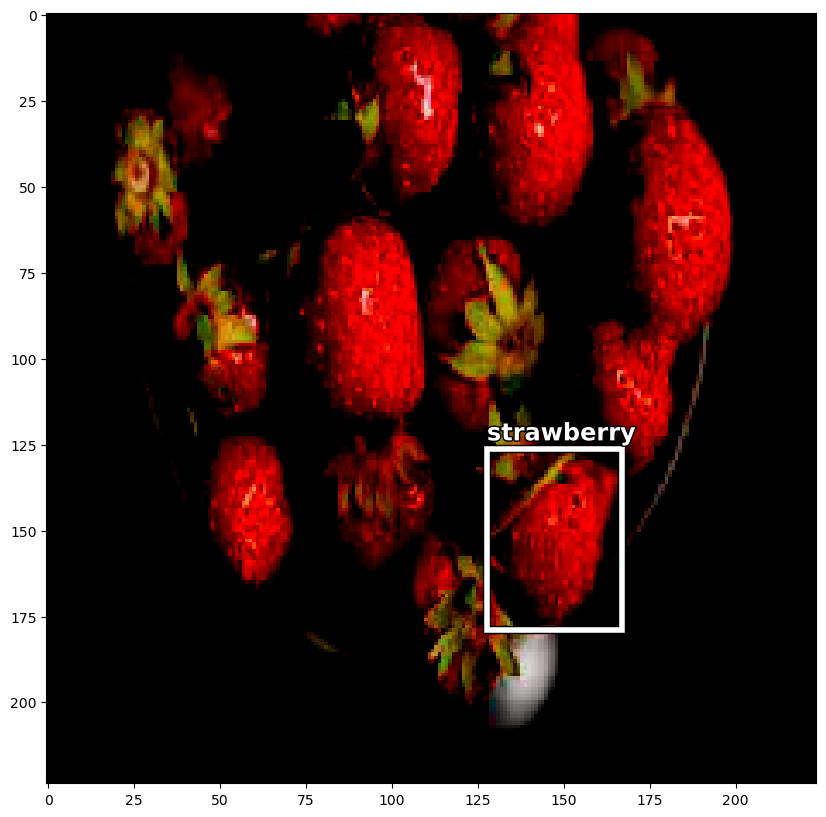

In [92]:
plot_image_from_batch(X, y_class, y_bbox, 7)

In [93]:
X, (y_class, y_bbox) = next(train_iter)

## Load the best model from last time

In [94]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras.models import Model, load_model
from keras import optimizers, callbacks
import keras.backend as K
from tensorflow.python.keras import regularizers

classifier_model = load_model("multisnacks-0.7162-0.8419.hdf5")

In [96]:
classifier_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_3  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 20)                20500     
                                                                 
 activation_3 (Activation)   (None, 20)                0         
                                                                 
Total params: 3249364 (12.40 MB)
Trainable params: 322

## Add the bounding box predictor to the model

In [97]:
num_classes = 20

# The MobileNet feature extractor is the first "layer".
base_model = classifier_model.layers[0]

# Add a global average pooling layer after MobileNet.
pool = GlobalAveragePooling2D()(base_model.outputs[0])

# Reconstruct the classifier layers.
clf = Dropout(0.7)(pool)
clf = Dense(num_classes, kernel_regularizer=regularizers.l2(0.01), name="dense_class")(clf)
clf = Activation("softmax", name="class_prediction")(clf)

# Add new layers for the bounding box predictor.
bbox = Conv2D(512, 3, padding="same")(base_model.outputs[0])
bbox = BatchNormalization()(bbox)
bbox = Activation("relu")(bbox)
bbox = GlobalAveragePooling2D()(bbox)
bbox = Dense(4, name="bbox_prediction")(bbox)

# Create the new model.
model = Model(inputs=base_model.inputs, outputs=[clf, bbox])

In [98]:
for layer in base_model.layers:
    layer.trainable = False

In [99]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                        

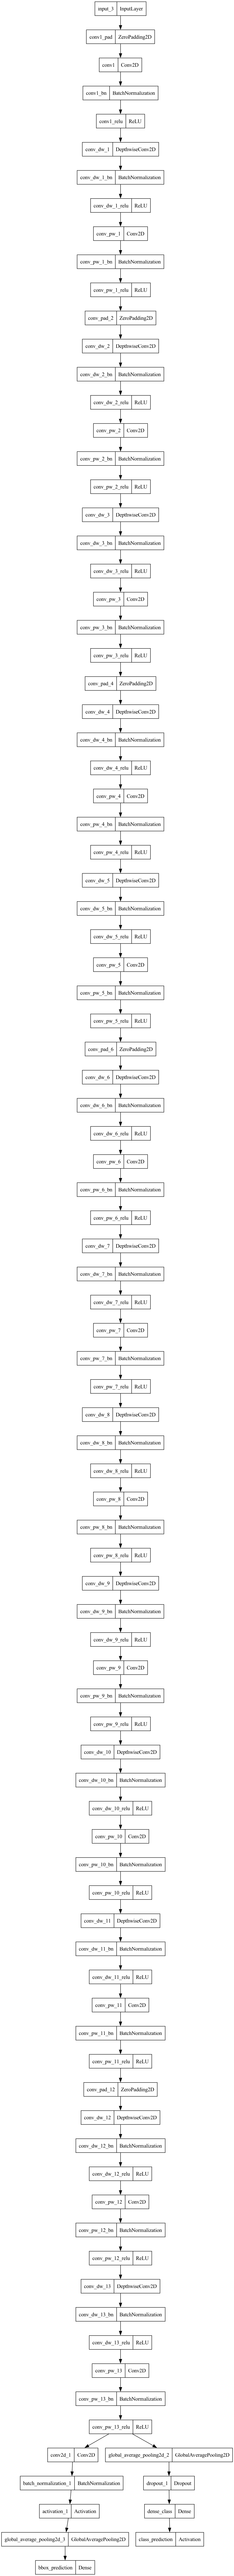

In [100]:
from keras.utils import plot_model
plot_model(model, to_file="bbox_model.png")

Put the old weights back, or the classifier won't work anymore:

In [101]:
layer_dict = {layer.name:i for i, layer in enumerate(model.layers)}

# Get the weights from the checkpoint model.
weights, biases = classifier_model.layers[-2].get_weights()

# Put them into the new model.
model.layers[layer_dict["dense_class"]].set_weights([weights, biases])

In [103]:
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[1.0, 10.0],
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
              metrics={ "class_prediction": "accuracy" })

## Try the model on an image

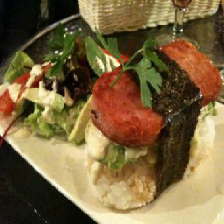

In [104]:
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image

img = image.load_img(train_dir + "/salad/2ad03070c5900aac.jpg", target_size=(image_width, image_height))
img

In [105]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [106]:
preds = model.predict(x)
preds

1/1 [==============================] - 0s 282ms/step


[array([[5.5659184e-05, 7.1898006e-07, 7.4317104e-05, 4.5374900e-06,
         2.9821708e-04, 2.9114724e-06, 5.2616483e-06, 4.8986322e-04,
         6.5828499e-04, 6.8758015e-04, 3.6887792e-05, 6.2949307e-06,
         1.6075664e-05, 2.1348803e-04, 1.9503836e-06, 8.5053478e-07,
         9.7398043e-01, 2.2265140e-03, 1.5832022e-03, 1.9656967e-02]],
       dtype=float32),
 array([[ 1.681057 , -2.181412 ,  1.2927969,  0.3538378]], dtype=float32)]

In [107]:
len(preds)

2

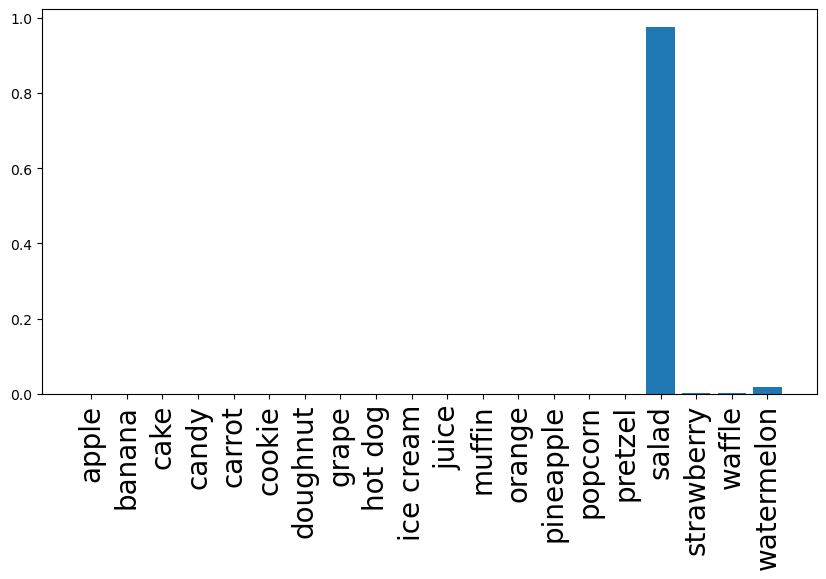

In [108]:
plt.figure(figsize=(10, 5))
plt.bar(range(num_classes), preds[0].squeeze())
plt.xticks(range(num_classes), labels, rotation=90, fontsize=20)
plt.show()

In [109]:
preds = classifier_model.predict(x)
preds

1/1 [==============================] - 0s 269ms/step


array([[5.5659184e-05, 7.1898006e-07, 7.4317104e-05, 4.5374900e-06,
        2.9821708e-04, 2.9114724e-06, 5.2616483e-06, 4.8986322e-04,
        6.5828499e-04, 6.8758015e-04, 3.6887792e-05, 6.2949307e-06,
        1.6075664e-05, 2.1348803e-04, 1.9503836e-06, 8.5053478e-07,
        9.7398043e-01, 2.2265140e-03, 1.5832022e-03, 1.9656967e-02]],
      dtype=float32)

In [111]:
preds = model.predict(train_generator)

  3/220 [..............................] - ETA: 43s

KeyboardInterrupt: 

In [39]:
preds[1].shape

(7040, 4)

## Train the model

In [112]:
val_generator = BoundingBoxGenerator(val_annotations, val_dir, 
                                     image_height, image_width, 
                                     batch_size, shuffle=False)

len(val_generator)

44

In [113]:
from helpers import combine_histories, plot_loss, plot_bbox_loss

In [114]:
histories = []

In [115]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=1,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

220/220 [==============================] - 73s 328ms/step - loss: 2.4559 - class_prediction_loss: 0.4196 - bbox_prediction_loss: 0.1899 - class_prediction_accuracy: 0.8911 - val_loss: 1.2526 - val_class_prediction_loss: 0.6238 - val_bbox_prediction_loss: 0.0494 - val_class_prediction_accuracy: 0.8189


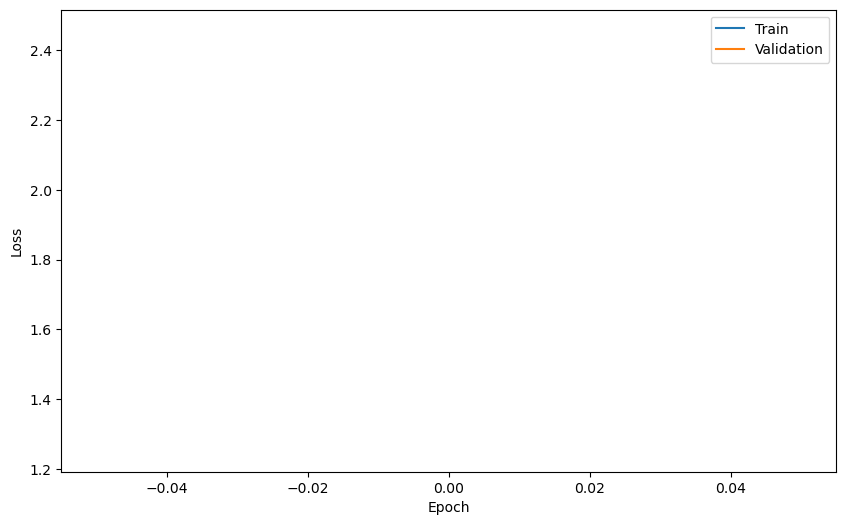

In [117]:
history = combine_histories(histories)
plot_loss(history)

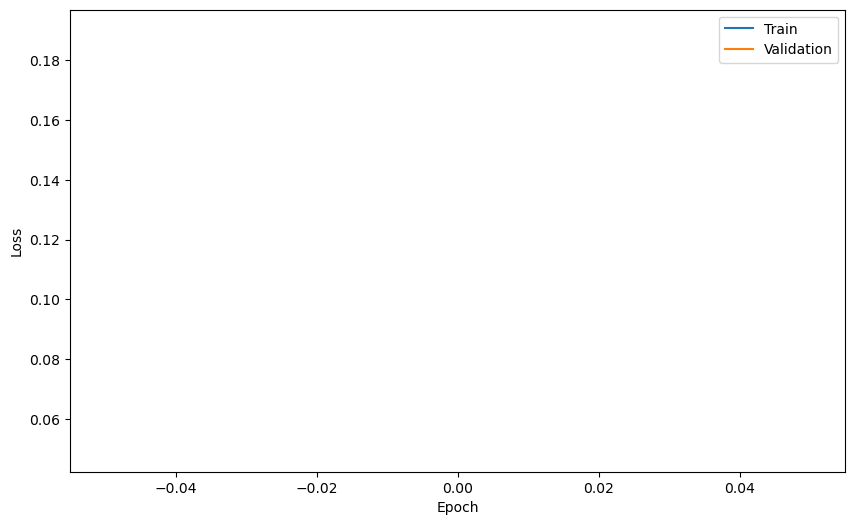

In [118]:
plot_bbox_loss(history)

## Adding the IOU metric

In [121]:
from helpers import iou, MeanIOU, plot_iou

bbox1 = [0.2, 0.7, 0.3, 0.6, "bbox1"]
bbox2 = [0.4, 0.6, 0.2, 0.5, "bbox2"]
iou(bbox1, bbox2)

0.23529411764705882

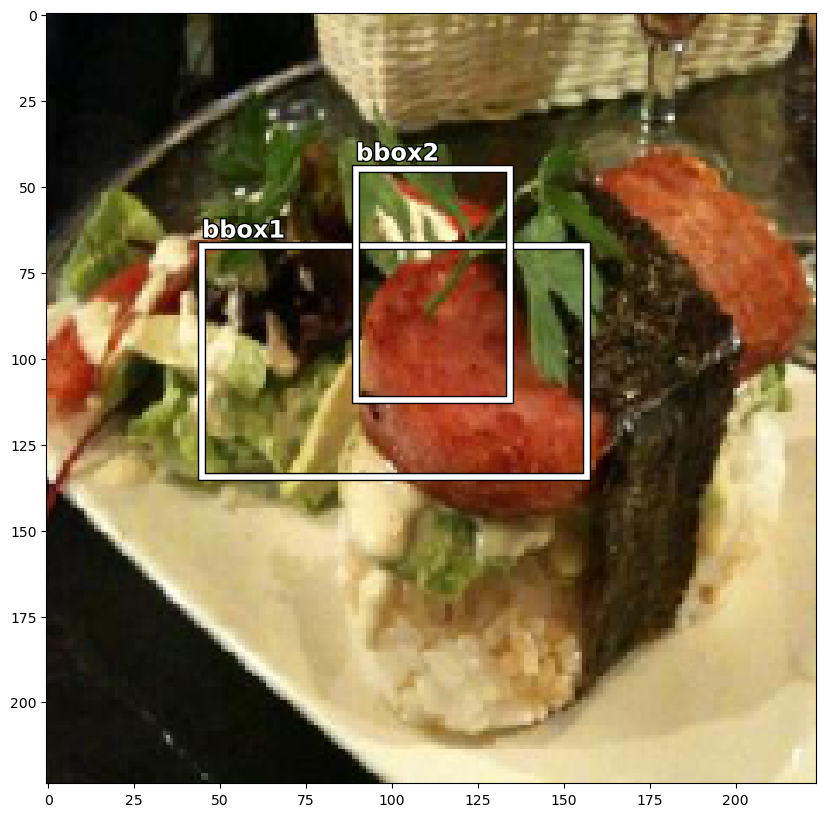

In [122]:
plot_image(img, [bbox1, bbox2])

**NOTE:** At this point I went back to the beginning of the notebook and created the model again. That way you can see clearer how the mean IOU increases over time. Just run all the cells from the section **Add the bounding box predictor to the model** again, then come back here. 

In [123]:
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[1.0, 10.0],
              optimizer=optimizers.legacy.Adam(learning_rate=1e-3),
              metrics={ "class_prediction": "accuracy", 
                        "bbox_prediction": MeanIOU().mean_iou },
                        run_eagerly=True)

In [124]:
histories = []

In [125]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=1,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

220/220 [==============================] - 268s 1s/step - loss: 1.0609 - class_prediction_loss: 0.3773 - bbox_prediction_loss: 0.0548 - class_prediction_accuracy: 0.8974 - bbox_prediction_mean_iou: 0.2704 - val_loss: 1.1319 - val_class_prediction_loss: 0.5612 - val_bbox_prediction_loss: 0.0430 - val_class_prediction_accuracy: 0.8281 - val_bbox_prediction_mean_iou: 0.3236


In [51]:
K.set_value(model.optimizer.learning_rate, K.get_value(model.optimizer.learning_rate) / 10)

In [52]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=1,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

220/220 [==============================] - 211s 958ms/step - loss: 0.7516 - class_prediction_loss: 0.3381 - bbox_prediction_loss: 0.0274 - class_prediction_accuracy: 0.9041 - bbox_prediction_mean_iou: 0.3802 - val_loss: 1.0884 - val_class_prediction_loss: 0.5717 - val_bbox_prediction_loss: 0.0379 - val_class_prediction_accuracy: 0.8253 - val_bbox_prediction_mean_iou: 0.3333


In [53]:
K.set_value(model.optimizer.lr, K.get_value(model.optimizer.learning_rate) / 10)

In [54]:
histories.append(model.fit(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     epochs=1,
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     workers=8))

220/220 [==============================] - 207s 939ms/step - loss: 0.7145 - class_prediction_loss: 0.3316 - bbox_prediction_loss: 0.0245 - class_prediction_accuracy: 0.9129 - bbox_prediction_mean_iou: 0.4020 - val_loss: 1.0776 - val_class_prediction_loss: 0.5733 - val_bbox_prediction_loss: 0.0367 - val_class_prediction_accuracy: 0.8267 - val_bbox_prediction_mean_iou: 0.3381


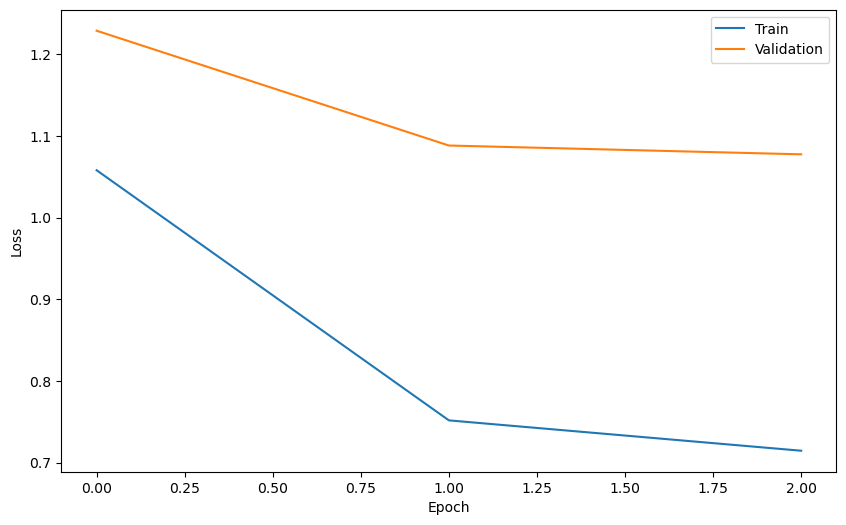

In [55]:
history = combine_histories(histories)
plot_loss(history)

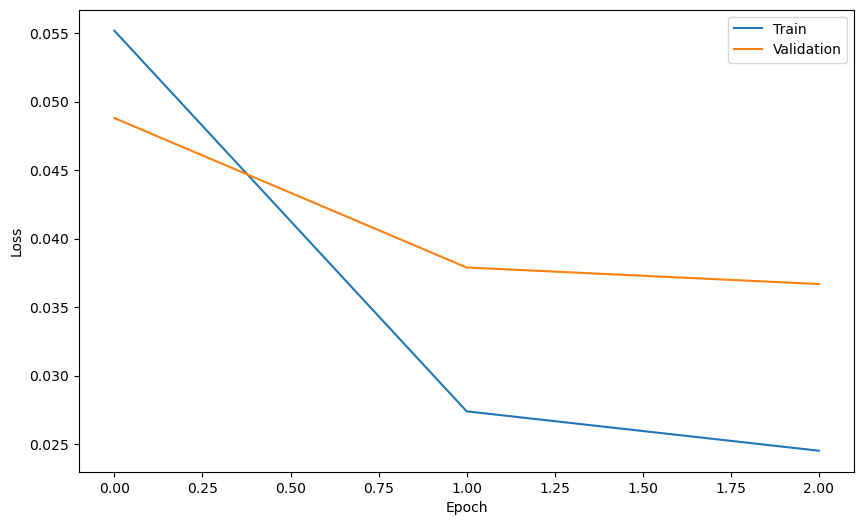

In [56]:
plot_bbox_loss(history)

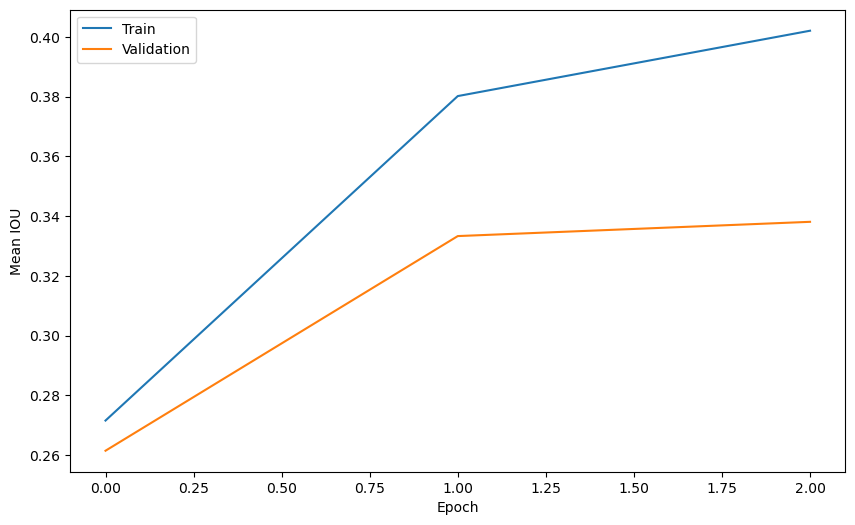

In [57]:
plot_iou(history)

## Try the model on the test set

In [58]:
def plot_prediction(row, image_dir):
    image_path = os.path.join(image_dir, row["folder"], row["image_id"] + ".jpg")
    img = image.load_img(image_path, target_size=(image_width, image_height))
    bbox_true = [row["x_min"], row["x_max"], row["y_min"], row["y_max"], row["class_name"].upper()]
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    bbox_pred = [*pred[1][0], labels[np.argmax(pred[0])]]
    
    plot_image(img, [bbox_true, bbox_pred])
   
    print("IOU:", iou(bbox_true, bbox_pred))

1/1 [==============================] - 0s 91ms/step


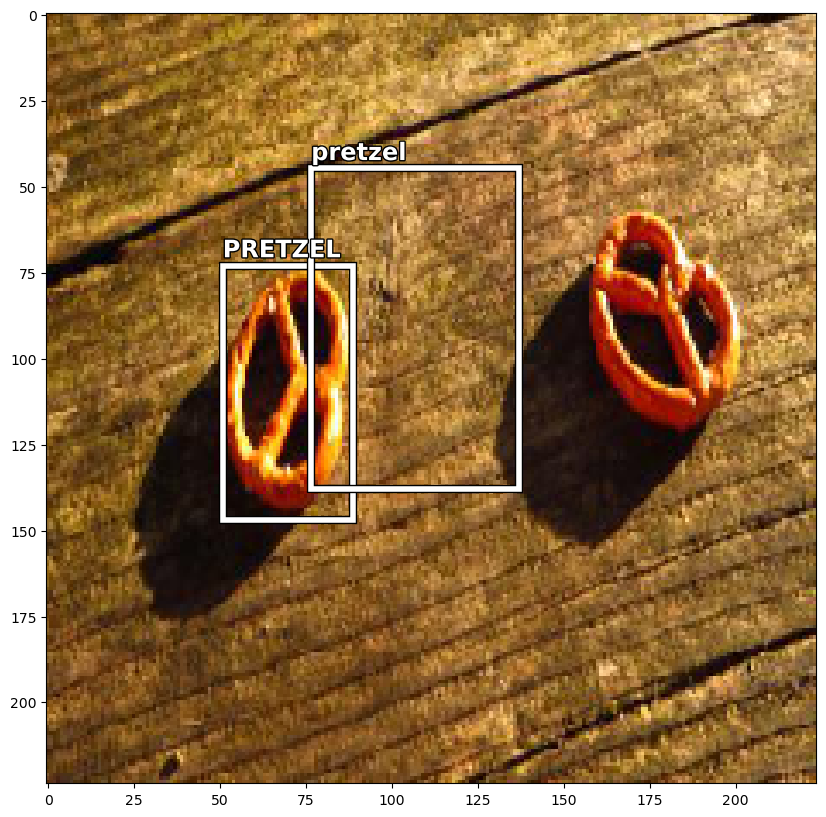

IOU: 0.10367985421572672


In [59]:
row_index = np.random.randint(len(test_annotations))
row = test_annotations.iloc[row_index]
plot_prediction(row, test_dir)

In [69]:
import coremltools


model.save("best_model.keras")

coreml_model = coremltools.convert(model)


coreml_model.save("MultiSnacks_ob.mlmodel")


Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 292/292 [00:03<00:00, 73.60 ops/s] 
